# Entendimento dos Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv = pd.read_csv("/content/drive/MyDrive/Anotações - Inteli/Módulo 11 - Brastel/Semana 5/Air Pollution.csv")
csv.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,2022
1,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,2022
2,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,2022
3,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,2022
4,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,2022


Descrição dos dados:

O presente dataframe contém informações do nível de poluição de cidades ao redor do mundo, em 10 colunas:

1) Country Name - Nome do país que contém a cidade em questão.

2) City - Nome da cidade em que as medições foram realizadas.

3) Year - Ano em que a medição foi realizada em cada cidade.

4) PM2.5 (μg/m3) - Valor de partículas inaláveis, de diâmetro inferior a 2,5 micrometros, em microgramas por metro cúbico na cidade.

5) PM10 (μg/m3) - Valor de partículas inaláveis, de diâmetro inferior a 10 micrometros, em microgramas por metro cúbico na cidade.

6) NO2 (μg/m3) - Valor do nível do Dióxido de Nitrogênio em microgramas por metro cúbico.

7) PM2.5 temporal coverage (%) - Valor de partículas inaláveis, de diâmetro inferior a 2,5 micrometros, em porcentagem.

8) PM10 temporal coverage (%) - Valor de partículas inaláveis, de diâmetro inferior a 10 micrometros, em porcentagem.

9) NO2 temporal coverage (%)- Valor do nível do Dióxido de Nitrogênio em porcentagem.

10) Updated Year - Ano de última atualização dos dados.

In [3]:
# Verificando a quantidade de dados nulos
csv.isna().sum()

,0
Country Name,0
City,0
Year,0
PM2.5 (μg/m3),17143
PM10 (μg/m3),11082
NO2 (μg/m3),9991
PM25 temporal coverage (%),24916
PM10 temporal coverage (%),26810
NO2 temporal coverage (%),12301
Updated Year,0


In [4]:
# Como há muitos valores nulos e o nível de poluição depende somente de um índice, os nulos podem ser removidos.
# Também já é filtrado somente as colunas relevantes
df_clean = csv[['Country Name', 'City', 'Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].dropna()
df_clean

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
2,Albania,Durres,2016,14.32,24.56,24.78
7,Albania,Korce,2016,28.64,40.21,12.52
12,Albania,Vrith,2015,13.24,19.52,9.57
27,Australia,Adelaide,2012,7.30,16.53,8.93
28,Australia,Adelaide,2013,7.25,16.87,8.65
...,...,...,...,...,...,...
32032,United States of America,Urban Honolulu (Hi),2019,3.00,11.83,7.60
32036,United States of America,Vallejo-Fairfield (Ca),2012,9.00,11.10,17.20
32038,United States of America,Vallejo-Fairfield (Ca),2014,9.90,10.80,15.40
32078,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),2012,9.70,12.30,21.88


In [5]:
# Comparação dos nulos com demais valores e seus tipos
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                32191 non-null  object 
 1   City                        32191 non-null  object 
 2   Year                        32191 non-null  int64  
 3   PM2.5 (μg/m3)               15048 non-null  float64
 4   PM10 (μg/m3)                21109 non-null  float64
 5   NO2 (μg/m3)                 22200 non-null  float64
 6   PM25 temporal coverage (%)  7275 non-null   float64
 7   PM10 temporal coverage (%)  5381 non-null   float64
 8   NO2 temporal coverage (%)   19890 non-null  float64
 9   Updated Year                32191 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.5+ MB


In [6]:
# Verificação da cidade mais poluída
csv.max()

,0
Country Name,Viet Nam
City,Živinice
Year,2021
PM2.5 (μg/m3),191.9
PM10 (μg/m3),540.0
NO2 (μg/m3),210.68
PM25 temporal coverage (%),100.0
PM10 temporal coverage (%),100.0
NO2 temporal coverage (%),100.0
Updated Year,2022


In [7]:
# Verificação da cidade menos poluída
csv.min()

,0
Country Name,Afghanistan
City,A Coruna
Year,2000
PM2.5 (μg/m3),0.01
PM10 (μg/m3),1.04
NO2 (μg/m3),0.0
PM25 temporal coverage (%),0.0
PM10 temporal coverage (%),2.568493
NO2 temporal coverage (%),1.923077
Updated Year,2016


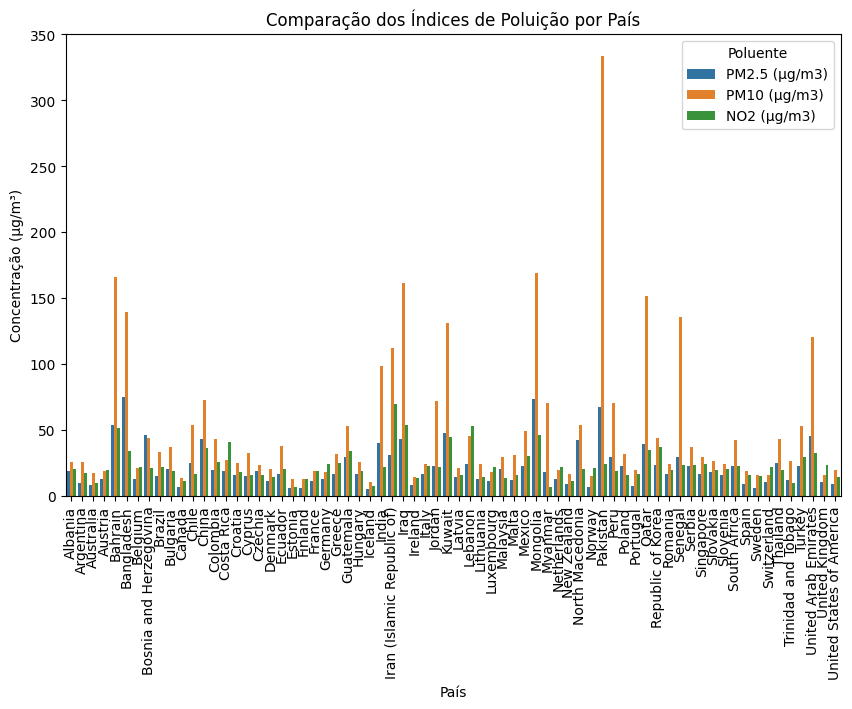

In [8]:
# Agrupar por país e calcular a média dos valores de poluentes de todas as cidades do país
df_pais = csv.groupby('Country Name')[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].mean().reset_index()

# Verificar se existem valores ausentes e removê-los
df_pais = df_pais.dropna()

# Transformar o DataFrame para um formato longo adequado para o Seaborn
csv_melted = df_pais.melt(id_vars='Country Name', var_name='Poluente', value_name='Valor')

# Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='Valor', hue='Poluente', data=csv_melted)

# Adicione rótulos e título
plt.title('Comparação dos Índices de Poluição por País')
plt.xlabel('País')
plt.ylabel('Concentração (µg/m³)')
plt.legend(title='Poluente')
plt.xticks(rotation=90)
plt.show()

# Tratando os dados

Tendo como referência o Decreto Estadual nº 59113/2013 de São Paulo, extraído do próprio site da Companhia Ambiental do Estado de São Paulo (CETESB), visto [neste link](https://cetesb.sp.gov.br/ar/padroes-de-qualidade-do-ar/), é possível classificar a qualidade do ar tendo como referência os valores de NO2 (μg/m3), PM10 (μg/m3) e PM2.5 (μg/m3), sendo que o maior valor de qualquer dos índices representa o nível de qualidade do ar da cidade. De forma resumida, a seguinte tabela demonstra as faixas de qualidade:

| Qualidade     | Índice        | MP10 (µg/m³) 24h | MP2,5 (µg/m³) 24h | O3 (µg/m³) 8h  | CO (ppm) 8h  | NO2 (µg/m³) 1h | SO2 (µg/m³) 24h |
|---------------|---------------|------------------|-------------------|----------------|--------------|----------------|-----------------|
| N1 – Boa      | 0 – 40        | 0 – 50           | 0 – 25            | 0 – 100        | 0 – 9        | 0 – 200        | 0 – 20          |
| N2 – Moderada | 41 – 80       | >50 – 100        | >25 – 50          | >100 – 130     | >9 – 11      | >200 – 240     | >20 – 40        |
| N3 – Ruim     | 81 – 120      | >100 – 150       | >50 – 75          | >130 – 160     | >11 – 13     | >240 – 320     | >40 – 365       |
| N4 – Muito Ruim| 121 – 200     | >150 – 250       | >75 – 125         | >160 – 200     | >13 – 15     | >320 – 1130    | >365 – 800      |
| N5 – Péssima  | >200          | >250             | >125              | >200           | >15          | >1130          | >800            |


Dessa forma, cada nível representará um valor de 1 a 5, e o maior valor encontrado para cada poluente será o nível de qualidade do ar do local, sendo 5 péssimo e 1 bom

In [9]:
# Função para classificar o índice de qualidade do ar
def categorizar_qualidade_ar(valor, breakpoints):
    for i, (menor, maior) in enumerate(breakpoints, 1):
        if menor <= valor <= maior:
            return i
    return 2  # Alguns casos específicos enquadram as saídas na 2ª faixa

In [10]:
# Definindo os intervalos de qualidade para cada poluente
pm10_breakpoints = [(0, 50), (51, 100), (101, 150), (151, 250), (251, float('inf'))]
pm25_breakpoints = [(0, 25), (26, 50), (51, 75), (76, 125), (126, float('inf'))]
no2_breakpoints = [(0, 200), (201, 240), (241, 320), (321, 1130), (1131, float('inf'))]

In [11]:
# Aplicar a função para cada poluente e criar novas colunas
df_clean['PM2.5_Quality'] = df_clean['PM2.5 (μg/m3)'].apply(categorizar_qualidade_ar, breakpoints=pm25_breakpoints)
df_clean['PM10_Quality'] = df_clean['PM10 (μg/m3)'].apply(categorizar_qualidade_ar, breakpoints=pm10_breakpoints)
df_clean['NO2_Quality'] = df_clean['NO2 (μg/m3)'].apply(categorizar_qualidade_ar, breakpoints=no2_breakpoints)
df_clean.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM2.5_Quality,PM10_Quality,NO2_Quality
2,Albania,Durres,2016,14.32,24.56,24.78,1,1,1
7,Albania,Korce,2016,28.64,40.21,12.52,2,1,1
12,Albania,Vrith,2015,13.24,19.52,9.57,1,1,1
27,Australia,Adelaide,2012,7.30,16.53,8.93,1,1,1
28,Australia,Adelaide,2013,7.25,16.87,8.65,1,1,1


In [12]:
# Criar a coluna 'Air_Quality' que será o maior valor entre as colunas de qualidade
df_clean['Air_Quality'] = df_clean[['PM10_Quality', 'PM2.5_Quality', 'NO2_Quality']].max(axis=1)
df_clean

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM2.5_Quality,PM10_Quality,NO2_Quality,Air_Quality
2,Albania,Durres,2016,14.32,24.56,24.78,1,1,1,1
7,Albania,Korce,2016,28.64,40.21,12.52,2,1,1,2
12,Albania,Vrith,2015,13.24,19.52,9.57,1,1,1,1
27,Australia,Adelaide,2012,7.30,16.53,8.93,1,1,1,1
28,Australia,Adelaide,2013,7.25,16.87,8.65,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
32032,United States of America,Urban Honolulu (Hi),2019,3.00,11.83,7.60,1,1,1,1
32036,United States of America,Vallejo-Fairfield (Ca),2012,9.00,11.10,17.20,1,1,1,1
32038,United States of America,Vallejo-Fairfield (Ca),2014,9.90,10.80,15.40,1,1,1,1
32078,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),2012,9.70,12.30,21.88,1,1,1,1


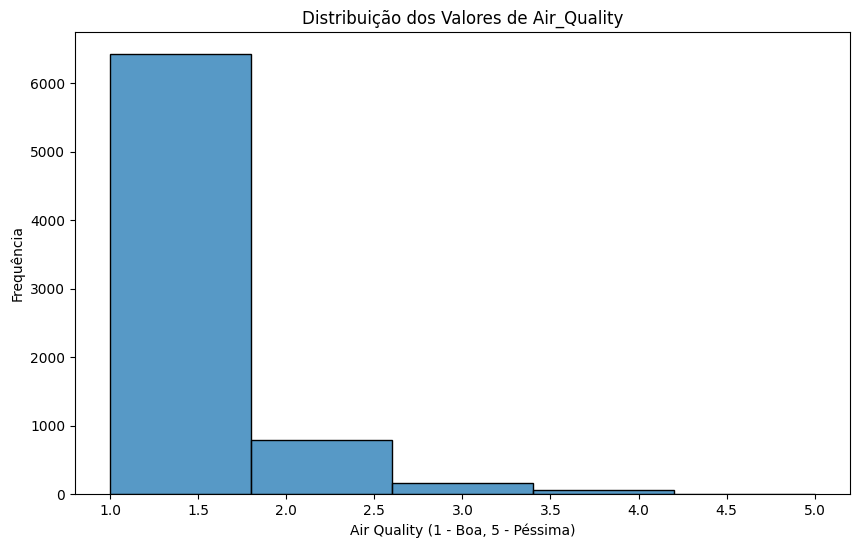

In [13]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o histograma usando seaborn
sns.histplot(df_clean['Air_Quality'], bins=5, kde=False)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição dos Valores de Air_Quality')
plt.xlabel('Air Quality (1 - Boa, 5 - Péssima)')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

# Escolhendo a Métrica principal

Tendo em vista que o objetivo da Rede Neural Recorrente (RNN) implementada deve ser predizer o valor do índice PM2.5 (μg/m³) de uma cidade e o valor a ser predito visa atingir um número em um espaço contínuo, o problema se trata de uma regressão contínua. Além disso, é evidente com base no gráfico logo acima que os dados estão fortemente desbalanceados, o que impacta diretamente na escolha da métrica principal para embasar o sucesso do modelo. Dessa forma, a métrica a ser escolhida precisa refletir a diferença entre o resultado predito e o valor real, considerando que não é possível o modelo acertar exatamente o valor real (motivo da acurácia não fazer sentido para esse problema). Por isso, a escolha de métrica principal será o **Mean Squared Error (MSE)**, pelos seguintes fatores:

- O MSE mede o erro médio ao quadrado entre os valores reais e preditos, sendo altamente sensível a grandes erros, o que é útil quando se deseja minimizar previsões discrepantes.
- Como o objetivo é prever o valor numérico exato de PM2.5, uma métrica que avalia a magnitude dos erros de forma contínua, como o MSE, é mais apropriada do que métricas usadas para problemas de classificação, como acurácia ou F1-score.
- O MSE é uma métrica padrão em problemas de regressão e oferece uma visão clara do quão distante as previsões do modelo estão dos valores reais.

# Treinando o Modelo

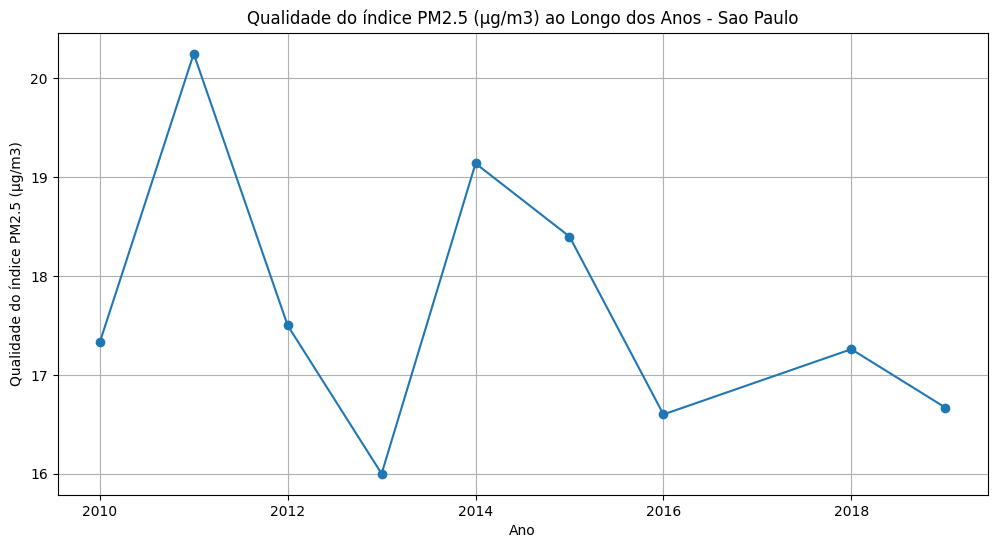

In [14]:
# Filtrar uma cidade para visualizar a tendência
city = 'Sao Paulo'
df_city = df_clean[df_clean['City'] == city]

# Plotar a qualidade do índice PM2.5 (μg/m3) ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_city['Year'], df_city['PM2.5 (μg/m3)'], marker='o')
plt.title(f'Qualidade do índice PM2.5 (μg/m3) ao Longo dos Anos - {city}')
plt.xlabel('Ano')
plt.ylabel('Qualidade do índice PM2.5 (μg/m3)')
plt.grid(True)
plt.show()

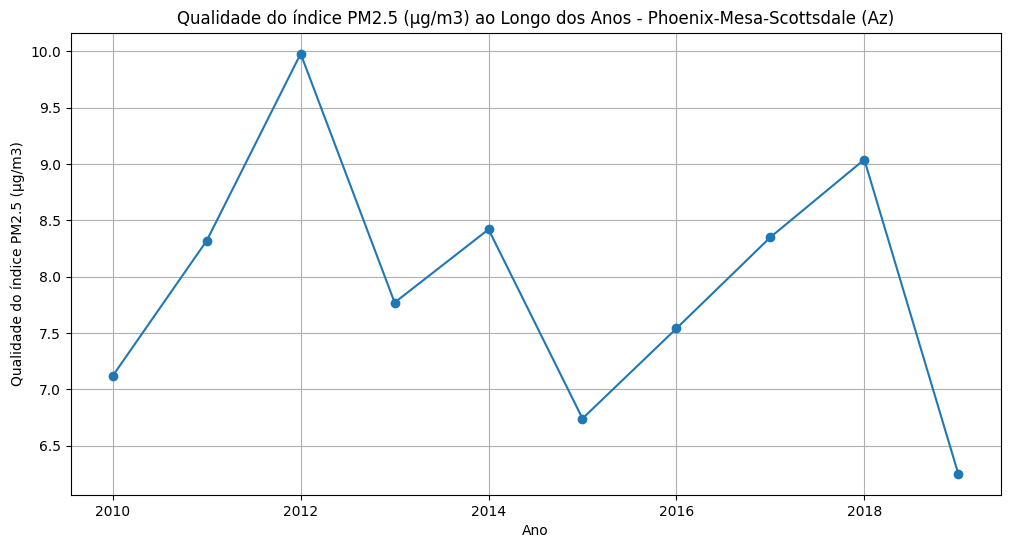

In [15]:
# Filtrar uma cidade para visualizar a tendência
city = 'Phoenix-Mesa-Scottsdale (Az)'
df_city_new = df_clean[df_clean['City'] == city]

# Plotar a qualidade do índice PM2.5 (μg/m3) ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_city_new['Year'], df_city_new['PM2.5 (μg/m3)'], marker='o')
plt.title(f'Qualidade do índice PM2.5 (μg/m3) ao Longo dos Anos - {city}')
plt.xlabel('Ano')
plt.ylabel('Qualidade do índice PM2.5 (μg/m3)')
plt.grid(True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import f1_score, classification_report
import numpy as np
from tensorflow.keras.layers import SimpleRNN, Dense, InputLayer
from sklearn.preprocessing import StandardScaler


In [27]:
# Ordenar os dados pelo ano, cidade e país
df_clean = df_clean.sort_values(by=['Country Name', 'City', 'Year'])

# Separar os dados em treinamento e teste
df_train, df_test = train_test_split(df_clean, test_size=0.3, shuffle=False)

# Função para criar sequências temporais para PM2.5
def criar_sequencias_temporais(df, max_len):
    X_seq = []
    y_seq = []
    for city in df['City'].unique():
        df_city = df[df['City'] == city]
        for i in range(max_len, len(df_city)):
            X_seq.append(df_city.iloc[i-max_len:i][['PM2.5 (μg/m3)']].values)  # Histórico de PM2.5
            y_seq.append(df_city.iloc[i]['PM2.5 (μg/m3)'])  # Prever o próximo valor de PM2.5
    return np.array(X_seq), np.array(y_seq)

# Definir o comprimento máximo da sequência
max_len = 5  # Usar os últimos 5 anos para prever o próximo valor de PM2.5

# Criar sequências para treino e teste
X_seq_train, y_seq_train = criar_sequencias_temporais(df_train, max_len)
X_seq_test, y_seq_test = criar_sequencias_temporais(df_test, max_len)

# Verificar se as sequências foram geradas corretamente
print(f"Número de sequências de treino: {len(X_seq_train)}")
print(f"Número de sequências de teste: {len(X_seq_test)}")

# Normalizar os dados (normalizar os valores de PM2.5)
scaler = StandardScaler()
X_seq_train = scaler.fit_transform(X_seq_train.reshape(-1, X_seq_train.shape[-1])).reshape(X_seq_train.shape)
X_seq_test = scaler.transform(X_seq_test.reshape(-1, X_seq_test.shape[-1])).reshape(X_seq_test.shape)

# Padronizar para sequências do mesmo tamanho
X_seq_train = pad_sequences(X_seq_train, maxlen=max_len, dtype='float32', padding='pre')
X_seq_test = pad_sequences(X_seq_test, maxlen=max_len, dtype='float32', padding='pre')

# Normalizar também os valores de PM2.5 do rótulo
y_seq_train = scaler.fit_transform(y_seq_train.reshape(-1, 1)).reshape(-1)
y_seq_test = scaler.transform(y_seq_test.reshape(-1, 1)).reshape(-1)

# Verificar o formato das sequências normalizadas
print(f"Formato de X_seq_train: {X_seq_train.shape}")
print(f"Formato de X_seq_test: {X_seq_test.shape}")

Número de sequências de treino: 946
Número de sequências de teste: 448
Formato de X_seq_train: (946, 5, 1)
Formato de X_seq_test: (448, 5, 1)


In [33]:
# Criar o modelo RNN para prever valores contínuos (PM2.5)
model = Sequential()
model.add(InputLayer(input_shape=(max_len, 1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(1))  # Saída para um valor contínuo (PM2.5)

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Verifica a configuração do modelo
model.summary()

# Treinar o modelo
history = model.fit(X_seq_train, y_seq_train, epochs=100, validation_data=(X_seq_test, y_seq_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4270 - mean_absolute_error: 0.3615 - val_loss: 0.3363 - val_mean_absolute_error: 0.3319
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1933 - mean_absolute_error: 0.2611 - val_loss: 0.3132 - val_mean_absolute_error: 0.3263
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1638 - mean_absolute_error: 0.2604 - val_loss: 0.2996 - val_mean_absolute_error: 0.3160
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1157 - mean_absolute_error: 0.2376 - val_loss: 0.3057 - val_mean_absolute_error: 0.3328
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1312 - mean_absolute_error: 0.2545 - val_loss: 0.2917 - val_mean_absolute_error: 0.3166
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1823 - mean_absolute_error: 0.2612 - val_loss: 0.2893 - val_mean_absolute_error: 0.3060
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1191 - mean_absolute_error: 0.2497 - val_los

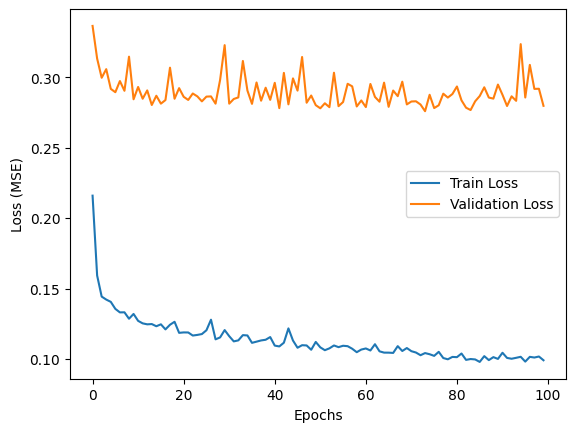

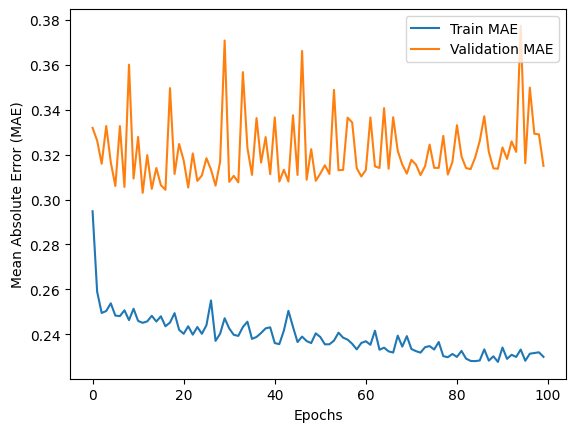

In [37]:
# Gráfico de perda (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Gráfico de erro absoluto médio (MAE)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.2796
Mean Absolute Error (MAE): 0.3150
R² Score: 0.8110


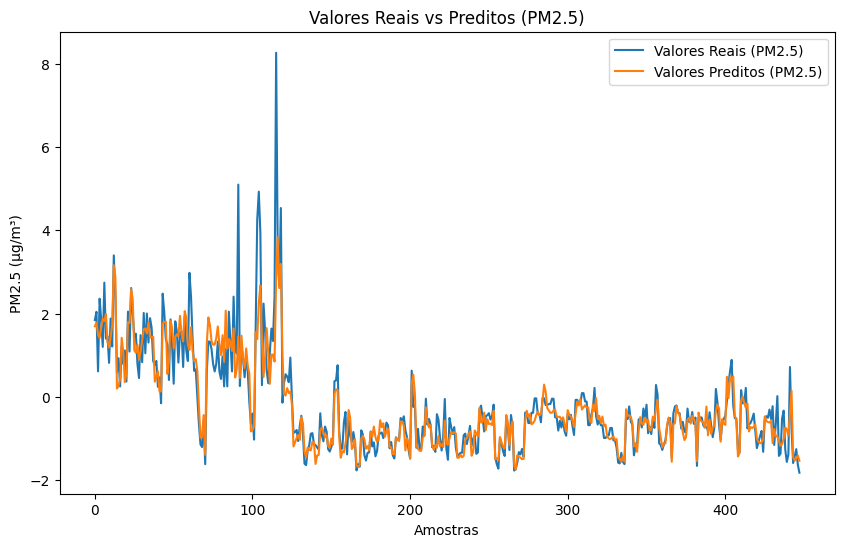

In [38]:
# Fazer previsões
y_pred = model.predict(X_seq_test)

# Calcular métricas de desempenho para regressão
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cálculo do MSE (erro quadrático médio)
mse = mean_squared_error(y_seq_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Cálculo do MAE (erro absoluto médio)
mae = mean_absolute_error(y_seq_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Cálculo do R² (coeficiente de determinação)
r2 = r2_score(y_seq_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Gráfico de comparação entre valores reais e preditos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_seq_test, label='Valores Reais (PM2.5)')
plt.plot(y_pred, label='Valores Preditos (PM2.5)')
plt.title('Valores Reais vs Preditos (PM2.5)')
plt.xlabel('Amostras')
plt.ylabel('PM2.5 (μg/m³)')
plt.legend()
plt.show()


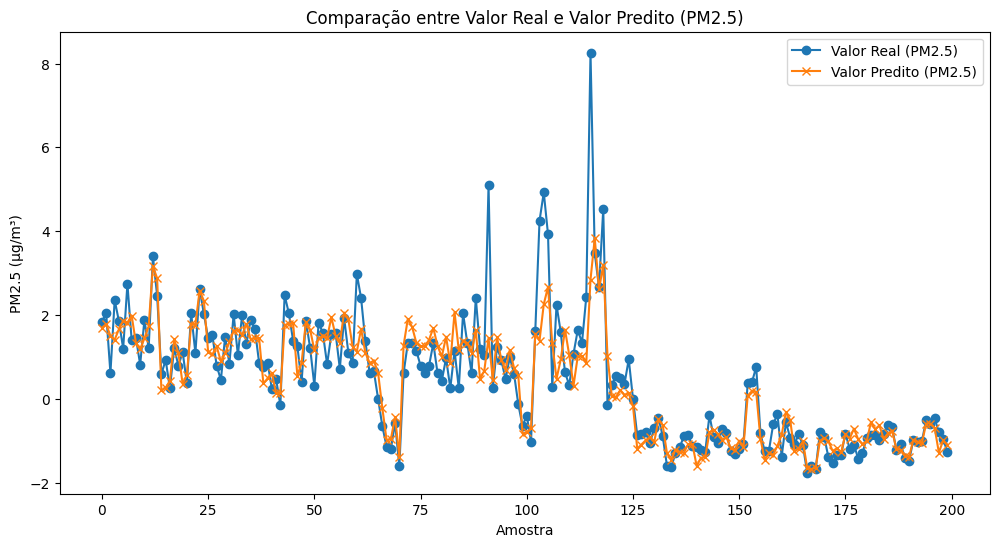

In [39]:
# Comparar previsões com os valores reais (PM2.5)
plt.figure(figsize=(12, 6))

# Exibindo os primeiros 200 valores reais e preditos
plt.plot(y_seq_test[:200], label='Valor Real (PM2.5)', marker='o')
plt.plot(y_pred[:200], label='Valor Predito (PM2.5)', marker='x')

plt.title('Comparação entre Valor Real e Valor Predito (PM2.5)')
plt.xlabel('Amostra')
plt.ylabel('PM2.5 (μg/m³)')
plt.legend()
plt.show()


Conclui-se que o modelo consegue prever com relativa precisão os valores de PM2.5 para um ano desconhecido com base nos dados dos anos anteriores